# What is this?

This notebook has results of simulated tier piece drops / trading using my raid team's exact comp to measure the impact of:

1. different trading strategies
2. \# of vault slots acquired
3. token assignments

on overall acquisition rates.

## Assumptions

Not all of the info about tier set drop rates is publicly known yet. I had to fill in some gaps in building this. Namely:

1. I assume that tier pieces dropping from the raid row of the vault use the raid loot table to determine odds of appearing.
2. I assume that non-raid vault slots have a 6% chance of being a tier piece.
3. I assume that all raid vault slots drop Heroic loot and all non-raid vault slots drop Mythic (i.e. M+ 15) level loot.
4. I assume that all tier pieces can appear in the first week's M+/PvP vault row, but only the first 3 slots can appear in the first raid vault row (and you can only get 2 of 3 raid slots due to opening schedule).

Tradeability is implemented per the leaked comments from Lore (and is in line with the followup blue post)

# Raidwide Acquisition Time

The first thing I want to look at is how long the *entire raid* will take to complete their 4pc bonuses with different trading strategies. The absolute numbers here depend rather heavily on the vault assumptions, but the relative values haven't changed much in response to altering the vault drop rates (unless you set it super low, in which case trading strategy basically doesn't matter).

In [1]:
import json
import pandas as pd
from plotnine import *

In [2]:
with open('data/oew_least_3vault.json') as f:
    data = json.load(f)

In [3]:
data['settings']

{'members': {'Atela': 'DeathKnight',
  'Mesprit': 'Warlock',
  'Sokchoy': 'Priest',
  'Keegan': 'Paladin',
  'Vaelldur': 'DemonHunter',
  'Tendronas': 'DemonHunter',
  'Zuko': 'Mage',
  'Rav': 'Rogue',
  'Kap': 'Hunter',
  'Gucci': 'Warlock',
  'Jop': 'Druid',
  'Kadmix': 'Priest',
  'Eisenpelz': 'Monk',
  'Traltixx': 'Hunter',
  'Ivan': 'Hunter',
  'Maelz': 'Shaman',
  'Velium': 'Monk',
  'Altenna': 'Shaman',
  'Heiji': 'Priest',
  'Flemingo': 'Druid',
  'Nosimage': 'Mage',
  'Wings': 'Rogue',
  'Nanuss': 'Warrior',
  'Divisive': 'Druid',
  'Kim': 'Priest'},
 'clears_per_week': ['Normal', 'Heroic'],
 'mythic_kills': [3, 4, 5, 6, 7, 7, 7, 8],
 'mythic_first_slot': 'Gloves',
 'num_extra_vault_items': 3,
 'trading_rule': {'target': 'LeastPieces'},
 'num_samples': 100000}

In [4]:
pct_4pc = pd.DataFrame.from_records([sample['pct_4pc'] for sample in data['samples']]).fillna(1.0)

In [5]:
pct_4pc_long = pct_4pc.melt(value_vars=pct_4pc.columns)

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


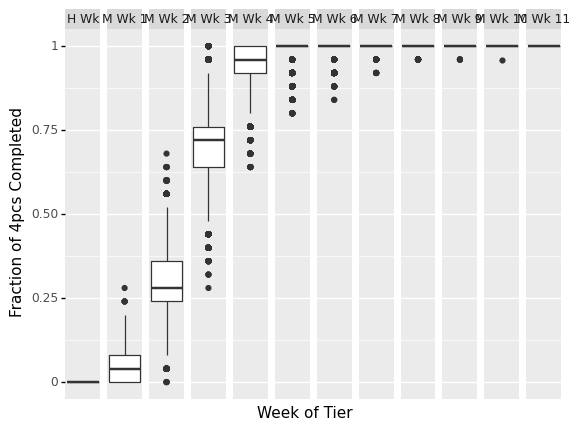

<ggplot: (8726495039214)>

In [6]:
ggplot(pct_4pc_long, aes(x=1, y='value')) \
    + stat_boxplot() \
    + facet_grid('~ variable', labeller=lambda wk: f'M Wk {wk}' if wk != '0' else 'H Wk') \
    + theme(axis_text_x=element_blank(), 
            axis_ticks_major_x=element_blank(),
            panel_grid_major_x=element_blank(), 
            panel_grid_minor_x=element_blank()) \
    + xlab('Week of Tier') \
    + ylab('Fraction of 4pcs Completed')

In [7]:
def settings_title(data):
    settings = data['settings']
    clears = ' and '.join(settings['clears_per_week'])
    rule = settings['trading_rule']['target']
    vault = settings['num_extra_vault_items']
    return f'Results for {rule} (Non-Raid Vault: {vault}, Clearing {clears} every week)'

In [8]:
def chart_weeks(path, field, ylabel, stat=stat_boxplot, navalue=1.0, ylimits=ylim(0,1), title=settings_title):
    with open(path) as f:
        data = json.load(f)
    df = pd.DataFrame.from_records(sample[field] for sample in data['samples']).fillna(navalue)
    df = df.melt(value_vars=df.columns)
    
    chart = ggplot(df, aes(x=1, y='value')) \
        + stat() \
        + facet_grid('~ variable', labeller=lambda wk: f'M Wk {wk}' if wk != '0' else 'H Wk') \
        + theme_bw() \
        + theme(axis_text_x=element_blank(), 
                axis_ticks_major_x=element_blank(),
                panel_grid_major_x=element_blank(), 
                panel_grid_minor_x=element_blank()) \
        + xlab('Week of Tier') \
        + ylab(ylabel) + ylimits + ggtitle(settings_title(data))
    
    return chart

## The LeastPieces Strategy

Read this like an APL.

1. Trade to the person with the fewest tier pieces (if they don't have this piece)
2. Trade to the person for whom this is the largest ilvl upgrade.

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


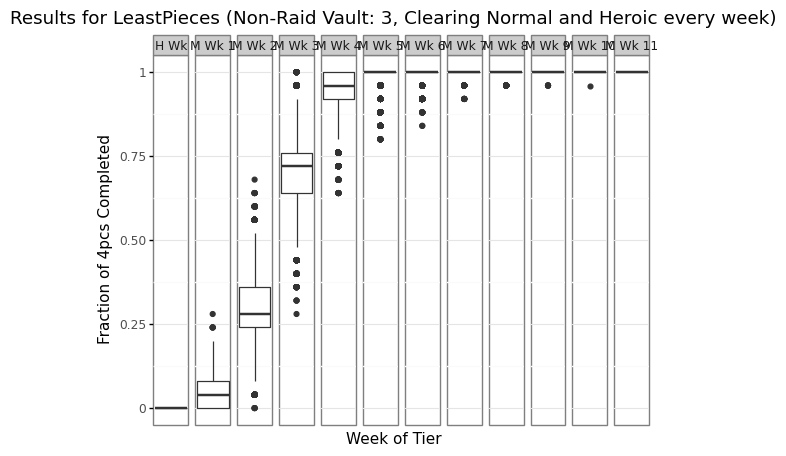

<ggplot: (8726494274070)>

In [9]:
chart_weeks('data/oew_least_3vault.json', 'pct_4pc', 'Fraction of 4pcs Completed')

## The MostSetCompletionsLeastPieces Strategy

Read this like an APL.

1. Trade to a player for whom this would complete a 4pc
2. Trade to a player for whom this would complete a 2pc
1. Trade to the person with the fewest tier pieces (if they don't have this piece)
2. Trade to the person for whom this is the largest ilvl upgrade.

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


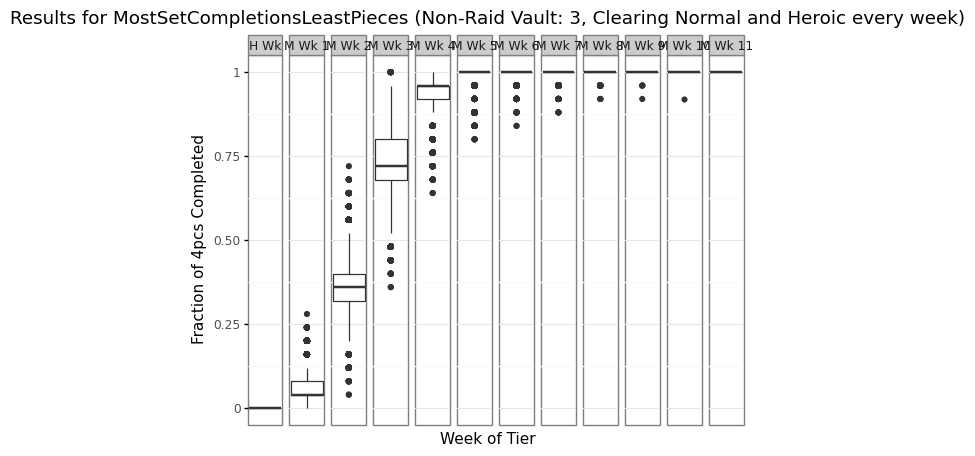

<ggplot: (8726466441238)>

In [10]:
chart_weeks('data/oew_leastset_3vault.json', 'pct_4pc', 'Fraction of 4pcs Completed')

The next chart uses old (Vanq/Conq/Prot) tokens instead of the newly-announced 4-token system.

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


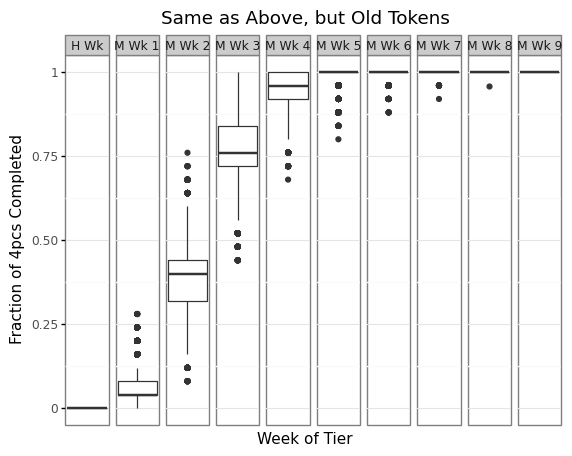

<ggplot: (8726459121728)>

In [11]:
chart_weeks('data/old-tokens/oew_leastset_3vault.json', 'pct_4pc', 'Fraction of 4pcs Completed') + ggtitle('Same as Above, but Old Tokens')

## The MostSetCompletionsMostPieces Strategy

Read this like an APL.

1. Trade to a player for whom this would complete a 4pc
2. Trade to a player for whom this would complete a 2pc
1. Trade to the person with the MOST tier pieces (if they don't have this piece)
2. Trade to the person for whom this is the largest ilvl upgrade.

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


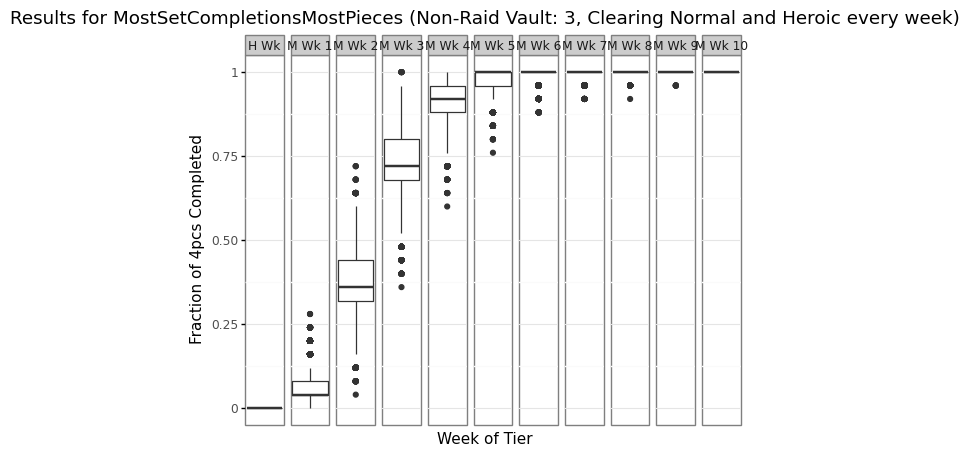

<ggplot: (8726495033823)>

In [12]:
chart_weeks('data/oew_mostset_3vault.json', 'pct_4pc', 'Fraction of 4pcs Completed')

### Fewer Vault Options

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


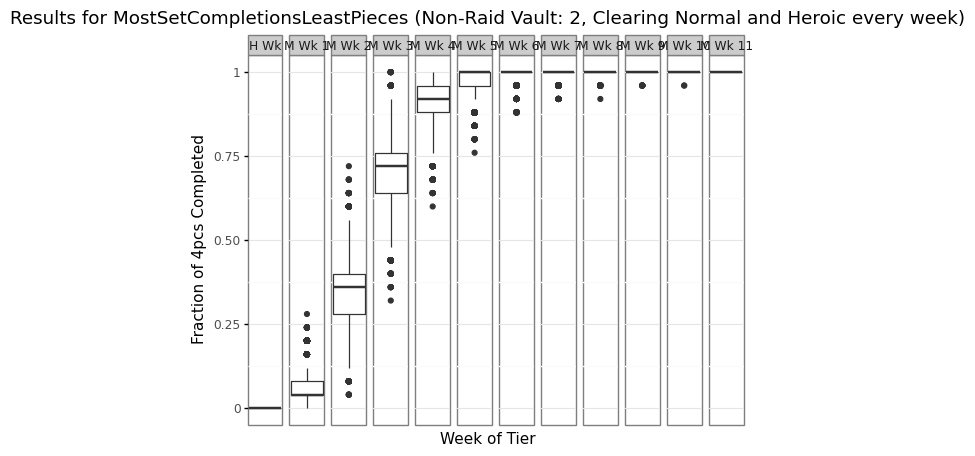

<ggplot: (8726441778932)>

In [13]:
chart_weeks('data/oew_leastset_2vault.json', 'pct_4pc', 'Fraction of 4pcs Completed')

### 2pc Completion Rates

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


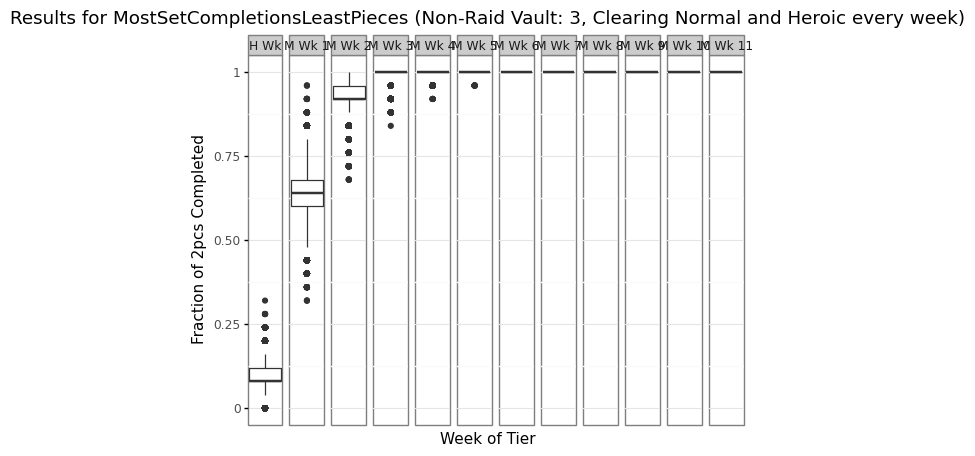

<ggplot: (8726459015479)>

In [14]:
chart_weeks('data/oew_leastset_3vault.json', 'pct_2pc', 'Fraction of 2pcs Completed')

/home/emallson/.cache/pypoetry/virtualenvs/tier-analysis-WdYx0efy-py3.9/lib/python3.9/site-packages/plotnine/utils.py:371: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


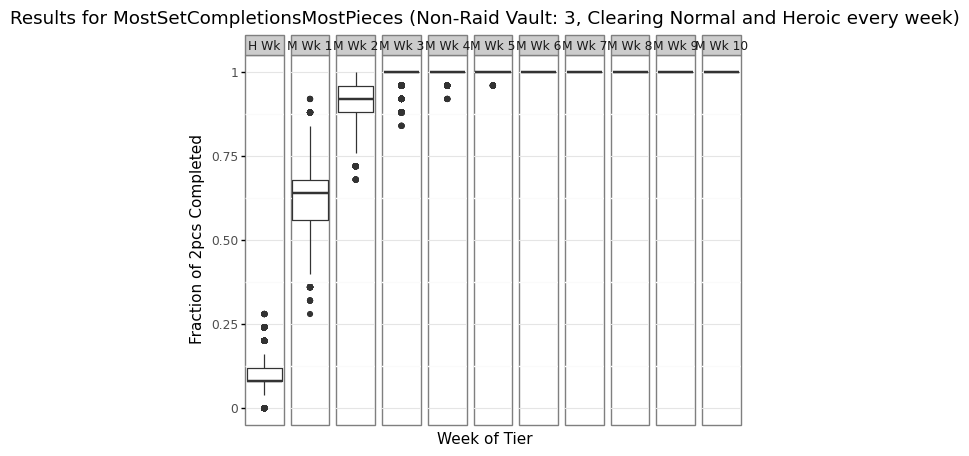

<ggplot: (8726441663058)>

In [15]:
chart_weeks('data/oew_mostset_3vault.json', 'pct_2pc', 'Fraction of 2pcs Completed')

# Per-Player Completion Rates

An important element of overall completion rate is per-player completion rate. Before the switch to tokens, my sim actually had similar overall completion time despite 2x the (simulated) loot dropping. This is primarily because of massive variance in trading cohorts: with per-class items some people have a cohort with 1 member (themselves) while others have 4 members, resulting in a huge variance in completion time.

The change to old-style tokens largely eliminated that effect, but the switch to 4 tokens reintroduced it (though it is FAR smaller than per-class items would've been).

In [16]:
def chart_players(path, mapper=lambda data: lambda k: data['settings']['members'][k]):
    with open(path) as f:
        data = json.load(f)
    players = data['players_ordered']
    df = pd.DataFrame.from_records((sample['completion_weeks'] for sample in data['samples']), columns=players)
    df = df.melt()
    
    m = mapper(data)
    
    df['variable'] = df['variable'].map(m)
    
    stats = df.groupby('variable').describe().droplevel(0,1).reset_index().sort_values('mean')
    ordering = stats['variable'].tolist()
    print(stats)
        
    return ggplot(stats, aes(y='variable')) \
        + geom_point(aes(x='mean')) \
        + geom_errorbarh(aes(xmin='mean - std', xmax ='mean + std')) \
        + scale_y_discrete(limits=ordering) \
        + xlim(0,6) + xlab('Weeks to Complete (Mean ± Std. Dev)') + ylab('Class') \
        + theme_bw()

       variable     count      mean       std  min  25%  50%  75%   max
4          Mage  200000.0  3.816785  0.956630  2.0  3.0  4.0  4.0   8.0
2         Druid  300000.0  3.829423  0.958069  2.0  3.0  4.0  4.0   9.0
3        Hunter  300000.0  3.847093  0.960741  2.0  3.0  4.0  4.0   9.0
9        Shaman  200000.0  3.871335  0.989164  2.0  3.0  4.0  4.0   9.0
7        Priest  400000.0  3.875377  0.990989  2.0  3.0  4.0  4.0  10.0
6       Paladin  100000.0  3.889960  0.997638  2.0  3.0  4.0  5.0  10.0
8         Rogue  200000.0  4.002970  1.091782  2.0  3.0  4.0  5.0  10.0
10      Warlock  200000.0  4.004090  1.094764  2.0  3.0  4.0  5.0  11.0
11      Warrior  100000.0  4.004670  1.091485  2.0  3.0  4.0  5.0  10.0
1   DemonHunter  200000.0  4.006655  1.094891  2.0  3.0  4.0  5.0  11.0
0   DeathKnight  100000.0  4.012110  1.093195  2.0  3.0  4.0  5.0  10.0
5          Monk  200000.0  4.012450  1.095213  2.0  3.0  4.0  5.0  12.0


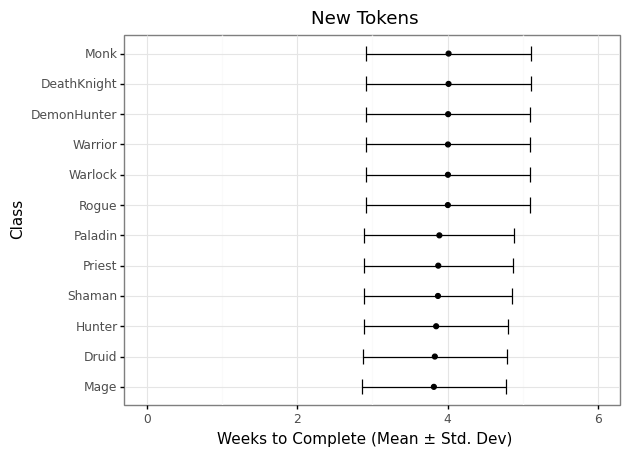

<ggplot: (8726457192858)>

In [17]:
chart_players('data/oew_leastset_3vault.json') + ggtitle('New Tokens')

Note the higher mean and variance for tokens that have smaller cohorts. I didn't break it down into tokens here but: DK, DH, Warlock and Rogue, Warrior, Monk are the two least populated tokens for my raid team (5 players each). Mage/Hunter/Druid has 8 players, and Paladin/Priest/Shaman has 7.

A major contributor to longer overall completion times is drop variance resulting in entirely wasted tier drops (we go from 3.2 to 4.8 wasted drops in the first 4 weeks in going from old tokens to new tokens).

       variable     count      mean       std  min  25%  50%  75%   max
10      Warlock  200000.0  3.783510  0.928895  2.0  3.0  4.0  4.0   9.0
7        Priest  400000.0  3.796813  0.934055  2.0  3.0  4.0  4.0   9.0
5          Monk  200000.0  3.802920  0.947562  2.0  3.0  4.0  4.0   8.0
8         Rogue  200000.0  3.814360  0.953301  2.0  3.0  4.0  4.0   9.0
1   DemonHunter  200000.0  3.819565  0.937407  2.0  3.0  4.0  4.0   8.0
6       Paladin  100000.0  3.823350  0.937568  2.0  3.0  4.0  4.0   8.0
9        Shaman  200000.0  3.826780  0.959302  2.0  3.0  4.0  4.0   9.0
2         Druid  300000.0  3.839877  0.961208  2.0  3.0  4.0  4.0  10.0
4          Mage  200000.0  3.840925  0.959940  2.0  3.0  4.0  4.0   9.0
3        Hunter  300000.0  3.848030  0.961214  2.0  3.0  4.0  4.0   9.0
0   DeathKnight  100000.0  3.848130  0.958089  2.0  3.0  4.0  4.0   8.0
11      Warrior  100000.0  3.852360  0.959423  2.0  3.0  4.0  4.0   9.0


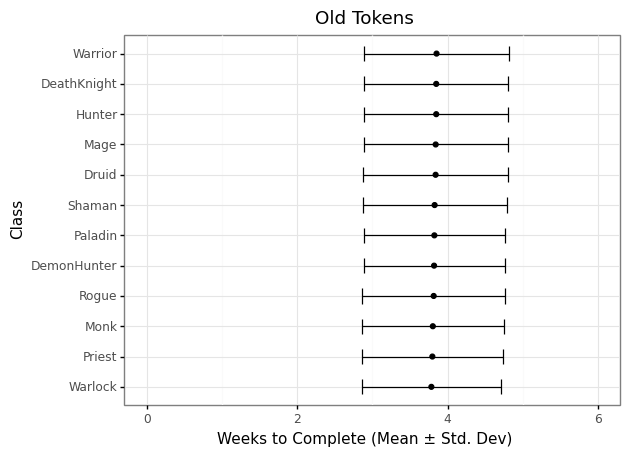

<ggplot: (8726432613431)>

In [18]:
chart_players('data/old-tokens/oew_leastset_3vault.json') + ggtitle('Old Tokens')

The old tokens display a *very small* difference in means across tokens, but it is effectively non-existent. 

                   variable     count     mean       std  min  25%  50%  75%  \
8               Jop - Druid  100000.0  3.79615  0.951990  2.0  3.0  4.0  4.0   
16          Nosimage - Mage  100000.0  3.81257  0.954866  2.0  3.0  4.0  4.0   
24              Zuko - Mage  100000.0  3.82100  0.958378  2.0  3.0  4.0  4.0   
10             Kap - Hunter  100000.0  3.83819  0.958518  2.0  3.0  4.0  4.0   
4          Flemingo - Druid  100000.0  3.84434  0.955949  2.0  3.0  4.0  4.0   
12             Kim - Priest  100000.0  3.84456  0.981686  2.0  3.0  4.0  4.0   
2          Divisive - Druid  100000.0  3.84778  0.965359  2.0  3.0  4.0  4.0   
20        Traltixx - Hunter  100000.0  3.85151  0.962575  2.0  3.0  4.0  4.0   
7             Ivan - Hunter  100000.0  3.85158  0.961073  2.0  3.0  4.0  4.0   
0          Altenna - Shaman  100000.0  3.86083  0.984993  2.0  3.0  4.0  4.0   
6            Heiji - Priest  100000.0  3.87557  0.990816  2.0  3.0  4.0  4.0   
13           Maelz - Shaman  100000.0  3

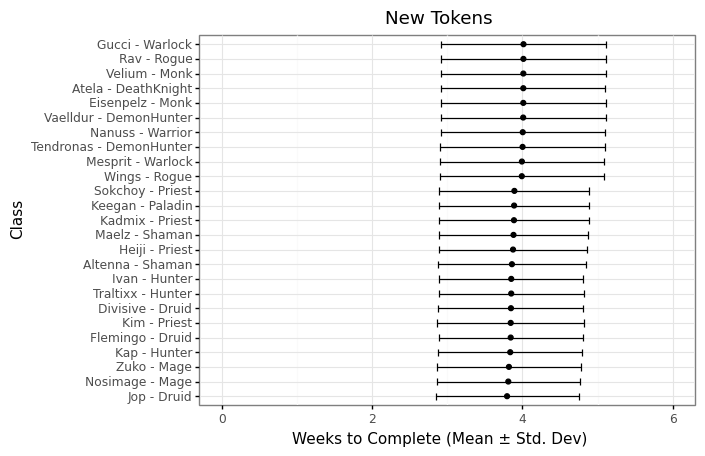

<ggplot: (8726474883509)>

In [19]:
chart_players('data/oew_leastset_3vault.json', lambda data: lambda k: k + ' - ' + data['settings']['members'][k]) + ggtitle('New Tokens')

Breaking this down by player highlights the more personal impact. Some of our raiders are likely to need an extra week to complete their 4pc set just by virtue of playing a less popular or less stackable class.

                   variable     count     mean       std  min  25%  50%  75%  \
18         Sokchoy - Priest  100000.0  3.75800  0.924178  2.0  3.0  4.0  4.0   
14        Mesprit - Warlock  100000.0  3.77720  0.926514  2.0  3.0  4.0  4.0   
5           Gucci - Warlock  100000.0  3.78982  0.931232  2.0  3.0  4.0  4.0   
23            Wings - Rogue  100000.0  3.79646  0.950421  2.0  3.0  4.0  4.0   
3          Eisenpelz - Monk  100000.0  3.80149  0.945195  2.0  3.0  4.0  4.0   
6            Heiji - Priest  100000.0  3.80157  0.933340  2.0  3.0  4.0  4.0   
22            Velium - Monk  100000.0  3.80435  0.949926  2.0  3.0  4.0  4.0   
9           Kadmix - Priest  100000.0  3.80677  0.937188  2.0  3.0  4.0  4.0   
4          Flemingo - Druid  100000.0  3.81456  0.956411  2.0  3.0  4.0  4.0   
21   Vaelldur - DemonHunter  100000.0  3.81779  0.935766  2.0  3.0  4.0  4.0   
0          Altenna - Shaman  100000.0  3.81780  0.958610  2.0  3.0  4.0  4.0   
12             Kim - Priest  100000.0  3

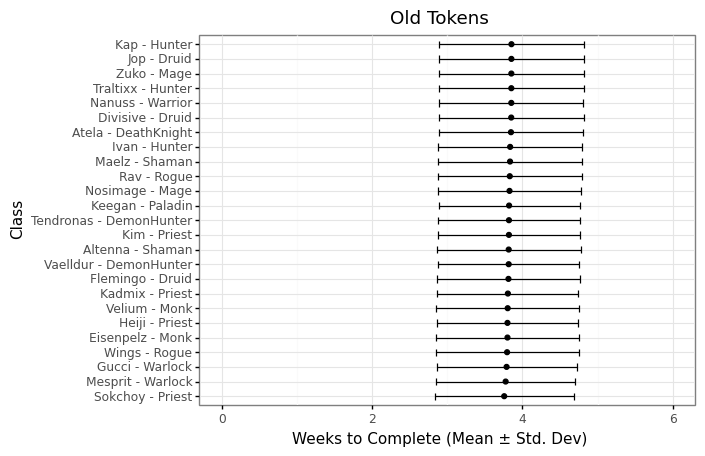

<ggplot: (8726494547770)>

In [20]:
chart_players('data/old-tokens/oew_leastset_3vault.json', lambda data: lambda k: k + ' - ' + data['settings']['members'][k]) + ggtitle('Old Tokens')

# OEM

I did the same for the other team in my guild (OE Midweek), which actually more clearly shows the stratification between tokens due to their smallest cohort being smaller and biggest cohort being bigger. 

                 variable     count     mean       std  min  25%  50%  75%  \
25           Zhot - Druid  100000.0  3.71902  0.902352  2.0  3.0  4.0  4.0   
13     Milksupply - Druid  100000.0  3.73356  0.906211  2.0  3.0  4.0  4.0   
17          Ogle - Hunter  100000.0  3.75052  0.908090  2.0  3.0  4.0  4.0   
24       Zarantai - Druid  100000.0  3.76927  0.910792  2.0  3.0  4.0  4.0   
19        Schlimm - Druid  100000.0  3.77742  0.912703  2.0  3.0  4.0  4.0   
23          Ugmo - Hunter  100000.0  3.79322  0.920690  2.0  3.0  4.0  4.0   
0            Babs - Druid  100000.0  3.79380  0.917960  2.0  3.0  4.0  4.0   
5          Draddog - Mage  100000.0  3.79978  0.919315  2.0  3.0  4.0  4.0   
9       Jonnycakes - Mage  100000.0  3.80265  0.916019  2.0  3.0  4.0  4.0   
6             Dz - Hunter  100000.0  3.80489  0.923012  2.0  3.0  4.0  4.0   
16       Nikita - Paladin  100000.0  3.91456  1.030122  2.0  3.0  4.0  5.0   
20      Seaborg - Warrior  100000.0  3.91733  1.034189  2.0  3.0

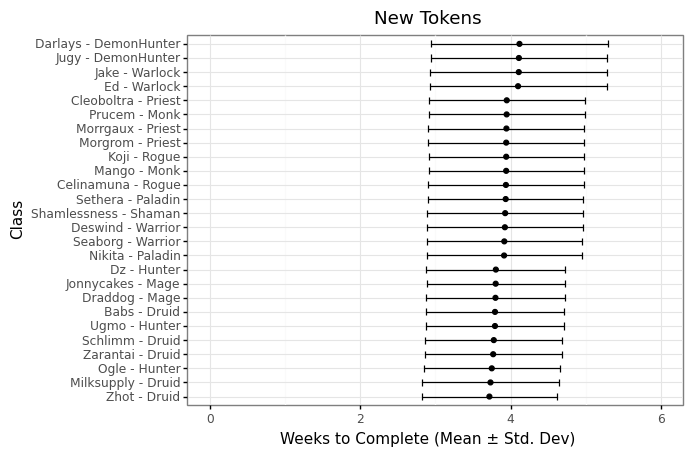

<ggplot: (8726495033622)>

In [21]:
chart_players('data/oem_leastset_3vault.json', lambda data: lambda k: k + ' - ' + data['settings']['members'][k]) + ggtitle('New Tokens')

                 variable     count     mean       std  min  25%  50%  75%  \
2     Cleoboltra - Priest  100000.0  3.75714  0.924839  2.0  3.0  4.0  4.0   
0            Babs - Druid  100000.0  3.76038  0.925046  2.0  3.0  4.0  4.0   
24       Zarantai - Druid  100000.0  3.77204  0.929916  2.0  3.0  4.0  4.0   
15      Morrgaux - Priest  100000.0  3.77231  0.927812  2.0  3.0  4.0  4.0   
13     Milksupply - Druid  100000.0  3.77972  0.932398  2.0  3.0  4.0  4.0   
3   Darlays - DemonHunter  100000.0  3.79154  0.929695  2.0  3.0  4.0  4.0   
19        Schlimm - Druid  100000.0  3.80046  0.932702  2.0  3.0  4.0  4.0   
7            Ed - Warlock  100000.0  3.80208  0.935434  2.0  3.0  4.0  4.0   
20      Seaborg - Warrior  100000.0  3.80680  0.953899  2.0  3.0  4.0  4.0   
8          Jake - Warlock  100000.0  3.81281  0.934761  2.0  3.0  4.0  4.0   
12           Mango - Monk  100000.0  3.81399  0.957256  2.0  3.0  4.0  4.0   
9       Jonnycakes - Mage  100000.0  3.81497  0.939469  2.0  3.0

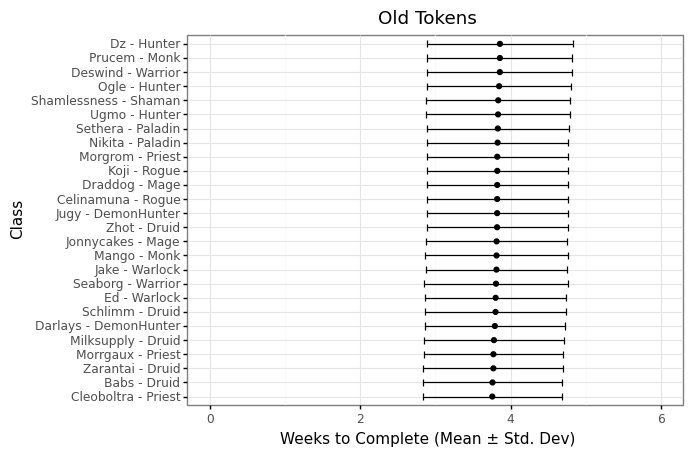

<ggplot: (8726459047099)>

In [22]:
chart_players('data/old-tokens/oem_leastset_3vault.json', lambda data: lambda k: k + ' - ' + data['settings']['members'][k]) + ggtitle('Old Tokens')

The gap in means between slowest and fastest completions with new tokens is about 2.5 times larger, but the gap in variances is the real killer: 8.3 times larger with new tokens.